In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data_2020_2024 = pd.read_csv("2020-11-01-2024-10-31.csv")
data_2016_2020 = pd.read_csv("2016-11-01-2020-10-31.csv")
data = pd.concat([data_2016_2020, data_2020_2024], axis=0)

In [12]:
data.shape

(2082701, 35)

In [4]:
data.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best'],
      dtype='object')

In [5]:
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best
0,TUR14067,31 October 2020,2020,1,Strategic developments,Strategic developments,Change to group/activity,Government of Turkey (2016-),NaN,State forces,...,37.0017,35.3289,3,Mezopotamya Agency; Anadolu Agency,National,"Security measures: On 31 October 2020, Adana G...",0,NaN,1604335373,NaN
1,TUR14069,31 October 2020,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (Turkey),NaN,Protesters,...,37.9136,40.2172,1,Haberler; Ihlas News Agency,National,"On 31 October 2020, families who claim their c...",0,crowd size=no report,1618495776,8955.0
2,LBN7617,31 October 2020,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (Lebanon),NaN,Protesters,...,34.4367,35.8497,1,An-Nahar,National,"On 31 October 2020, a number of weapon-wounded...",0,crowd size=no report,1604335373,26087.0
3,TUR14075,31 October 2020,2020,2,Strategic developments,Strategic developments,Arrests,Police Forces of Turkey (2016-),NaN,State forces,...,40.7670,29.7827,2,Anadolu Agency,National,"Arrests: Around 31 October 2020 (as reported),...",0,NaN,1604335373,NaN
4,IRN7741,31 October 2020,2020,1,Demonstrations,Protests,Peaceful protest,Protesters (Iran),Students (Iran),Protesters,...,33.4043,47.5700,1,Eteraze Bazar,New media,"On 31 October 2020, schoolchildren protested i...",0,crowd size=no report,1604335374,168.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082701 entries, 0 to 1294075
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   event_id_cnty       object 
 1   event_date          object 
 2   year                int64  
 3   time_precision      int64  
 4   disorder_type       object 
 5   event_type          object 
 6   sub_event_type      object 
 7   actor1              object 
 8   assoc_actor_1       object 
 9   inter1              object 
 10  actor2              object 
 11  assoc_actor_2       object 
 12  inter2              object 
 13  interaction         object 
 14  civilian_targeting  object 
 15  iso                 int64  
 16  region              object 
 17  country             object 
 18  admin1              object 
 19  admin2              object 
 20  admin3              object 
 21  location            object 
 22  latitude            float64
 23  longitude           float64
 24  geo_precision       int6

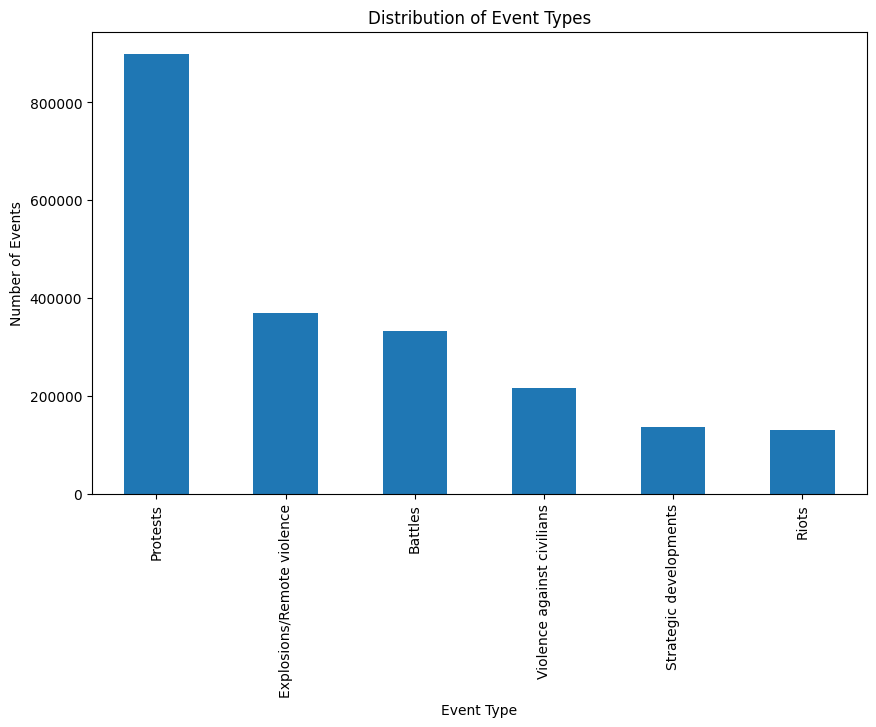

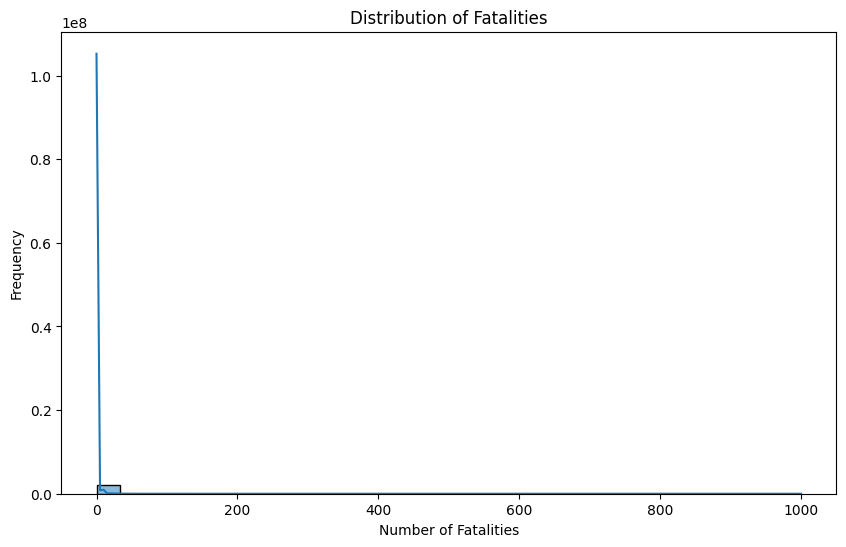

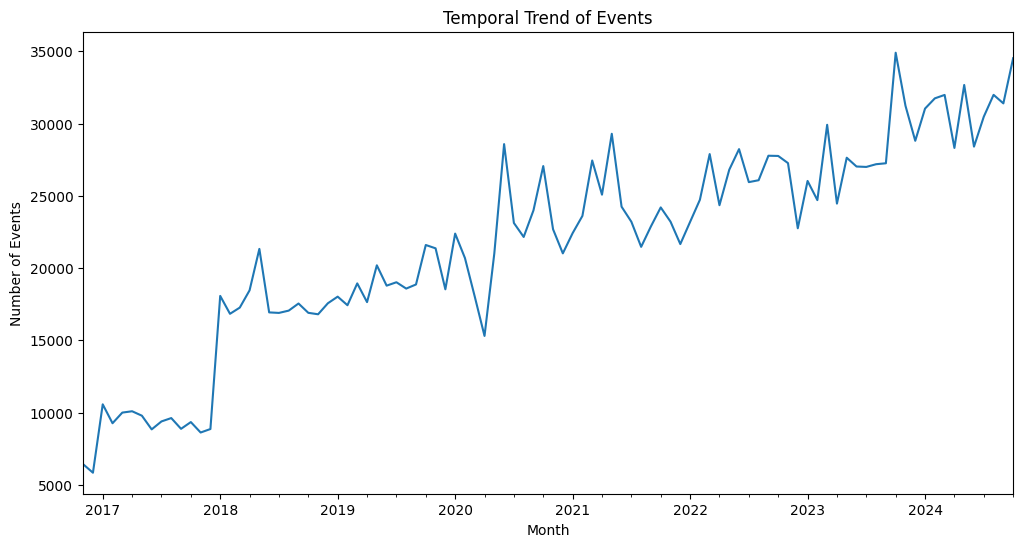

In [6]:
data.info()

descriptive_stats = data.describe()


missing_values = data.isnull().sum()

# Exploring the distribution of event types
event_type_counts = data['event_type'].value_counts()

# Plotting the event type distribution
plt.figure(figsize=(10, 6))
event_type_counts.plot(kind='bar')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.show()

# Exploring the distribution of fatalities
fatalities_distribution = data['fatalities'].astype(int)

# Plotting fatalities distribution
plt.figure(figsize=(10, 6))
sns.histplot(fatalities_distribution, bins=30, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

# Check temporal trends in the data
data['event_date'] = pd.to_datetime(data['event_date'])
temporal_trend = data.groupby(data['event_date'].dt.to_period("M")).size()

# Plotting temporal trends
plt.figure(figsize=(12, 6))
temporal_trend.plot()
plt.title('Temporal Trend of Events')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.show()

In [7]:
data['event_date'] = pd.to_datetime(data['event_date'])

data['year_month'] = data['event_date'].dt.to_period('M')

data['latitude_rounded'] = data['latitude'].round(2)
data['longitude_rounded'] = data['longitude'].round(2)

agg_data = data.groupby(['latitude_rounded', 'longitude_rounded']).agg({
    'event_id_cnty': 'count',      # Number of events
    'fatalities': 'sum',           # Total fatalities
    'geo_precision': 'mean',       # Average geospatial precision
    'population_best': 'mean',     # Average population impact
    'event_type': 'count',
    'sub_event_type': 'count'
}).reset_index()

agg_data.rename(columns={
    'event_id_cnty': 'event_count',
    'fatalities': 'total_fatalities',
    'geo_precision': 'avg_geo_precision',
    'population_best': 'avg_population'
}, inplace=True)

In [8]:
agg_data

,latitude_rounded,longitude_rounded,event_count,total_fatalities,avg_geo_precision,avg_population,event_type,sub_event_type
0,-90.00,45.00,1,0,1.0,NaN,1,1
1,-77.84,166.69,2,0,1.0,NaN,2,2
2,-74.71,-47.00,1,0,3.0,NaN,1,1
3,-70.63,-8.26,4,0,1.0,NaN,4,4
4,-67.57,-68.13,1,0,1.0,NaN,1,1
...,...,...,...,...,...,...,...,...
151355,71.29,-156.79,2,0,1.0,0.0,2,2
151356,71.33,-79.37,4,0,1.0,0.0,4,4
151357,72.70,-77.96,1,0,1.0,NaN,1,1
151358,78.22,15.65,5,0,1.0,NaN,5,5


In [9]:
agg_data['high_risk'] = (agg_data['event_count'] > 2).astype(int)


features = ['latitude_rounded', 'longitude_rounded', 'avg_geo_precision']
X = agg_data[features].fillna(0)  # Fill missing values with 0
y = agg_data['high_risk']


n = int(.8 * len(X))
X_train = X[:n]
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]


rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result


(0.6764336680761099,
 '              precision    recall  f1-score   support\n\n           0       0.70      0.79      0.74     17670\n           1       0.64      0.52      0.57     12602\n\n    accuracy                           0.68     30272\n   macro avg       0.67      0.65      0.66     30272\nweighted avg       0.67      0.68      0.67     30272\n')

In [10]:
accuracy

0.6764336680761099

In [11]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     17670
           1       0.64      0.52      0.57     12602

    accuracy                           0.68     30272
   macro avg       0.67      0.65      0.66     30272
weighted avg       0.67      0.68      0.67     30272

